### Notebook: using jsonstat.py to explore ISTAT data (house price index)
This Jupyter notebook shows how to use [jsonstat.py](http://github.com/26fe/jsonstat.py) python library to explore Istat data.
[Istat](http://www.istat.it/en/about-istat) is Italian National Institute of Statistics. It publishs a rest api for querying italian statistics. 

We starts importing some modules.

In [1]:
from __future__ import print_function
import os
import istat
from IPython.core.display import HTML

#### Step 1: using istat module to get a jsonstat collection

Following code sets a cache dir where to store json files download by Istat api. Storing file on disk speed up development, and assures consistent results over time. Anyway you can delete file to donwload a fresh copy.

In [2]:
cache_dir = os.path.abspath(os.path.join("..", "tmp", "istat_cached"))
istat.cache_dir(cache_dir)
print("cache_dir is '{}'".format(istat.cache_dir()))

cache_dir is '/Users/26fe_nas/gioprj.on_mac/prj.python/jsonstat.py/tmp/istat_cached'


Using istat api, we can shows the istat areas used to categorize the datasets

In [3]:
HTML(istat.areas_as_html())

id,desc
3,2011 Population and housing census
4,Enterprises
7,Environment and Energy
8,Population and Households
9,Households Economic Conditions and Disparities
10,Health statistics
11,Social Security and Welfare
12,Education and training
13,"Communication, culture and leisure"
14,Justice and Security


Following code list all datasets contained into area `Prices`.

In [4]:
istat_area_prices = istat.area('Prices')
HTML(istat_area_prices.datasets_as_html())

cod,name,dim
DCSC_FABBRESID_1,Construction costs index - monthly data,5
DCSC_PREZPRODSERV_1,Services producer prices index,5
DCSC_PREZZPIND_1,Producer price index for industrial products - monthly data,6
DCSP_FOI1,FOI  Monthly data until 2010,5
DCSP_FOI1B2010,FOI - Monthly data from 2011 to 2015,5
DCSP_FOI1B2015,FOI - Monthly data from 2016 onwards,5
DCSP_FOI2,FOI  Annual average until 2010,5
DCSP_FOI2B2010,FOI  Annual average from 2011 onwards,5
DCSP_FOI2B2015,FOI - Annual average from 2016 onwards,5
DCSP_FOI3,FOI  Weights until 2010,4


List all dimension for dataset `DCSP_IPAB` (House price index)

In [5]:
istat_dataset_dcsp_ipab = istat_area_prices.dataset('DCSP_IPAB')
HTML(istat_dataset_dcsp_ipab.info_dimensions_as_html())

nr,name,nr. values,values (first 3 values)
0,Territory,1,1:'Italy'
1,Index type,3,"18:'house price index (base 2010=100) - quarterly data', 19:'house price index (base 2010=100) - annual average', 20:'house price index (base 2010=100) - weights' ..."
2,Measure,5,"8:'annual average rate of change', 4:'index number', 22:'not applicable' ..."
3,Purchases of dwellings,3,"4:'H1 - all items', 5:'H11 - new dwellings', 6:'H12 - existing dwellings' ..."
4,Time and frequency,29,"2112:'Q1-2011', 2178:'Q3-2014', 2116:'Q2-2011' ..."


Finally from istat dataset we extracts data in jsonstat format by specifying dimensions we are interested.

In [6]:
spec = { 
    "Territory": 1, "Index type": 18, 
    # "Measure": 0, # "Purchases of dwelling": 0, # "Time and frequency": 0
}
# convert istat dataset into jsonstat collection and print some info
collection = istat_dataset_dcsp_ipab.getvalues(spec)
collection

JsonstatCollection contains the following JsonStatDataSet:
+-----+-------------------------------+
| pos | dataset                       |
+-----+-------------------------------+
| 0   | 'IDMISURA1*IDTYPPURCH*IDTIME' |
+-----+-------------------------------+

The previous call is equivalent to call istat api with a "1,18,0,0,0" string of number.
Below is the mapping from the number and dimensions:

| dimension            |    |                                                      |
|:---------------------|---:|:-----------------------------------------------------|
| Territory            | 1  | Italy                                                |
| Type                 | 18 | house price index (base 2010=100) - quarterly data'  |
| Measure              | 0  | ALL                                                  |  
| Purchase of dwelling | 0  | ALL                                                  |  
| Time and frequency   | 0  | ALL                                                  |


In [7]:
json_stat_data = istat_dataset_dcsp_ipab.getvalues("1,18,0,0,0")
json_stat_data

JsonstatCollection contains the following JsonStatDataSet:
+-----+-------------------------------+
| pos | dataset                       |
+-----+-------------------------------+
| 0   | 'IDMISURA1*IDTYPPURCH*IDTIME' |
+-----+-------------------------------+

#### step2: using jsonstat.py api.

Now we have a jsonstat collection, let expore it with the api of jsonstat.py

Print some info of one dataset contained into the above jsonstat collection

In [8]:
jsonstat_dataset = collection.dataset('IDMISURA1*IDTYPPURCH*IDTIME')
jsonstat_dataset

name:   'IDMISURA1*IDTYPPURCH*IDTIME'
label:  'House price index  by Measure, Purchases of dwellings and Time and frequency - Italy - house price index (base 2010=100) - quarterly data'
size: 207
+-----+------------+------------------------+------+------+
| pos | id         | label                  | size | role |
+-----+------------+------------------------+------+------+
| 0   | IDMISURA1  | Measure                | 3    |      |
| 1   | IDTYPPURCH | Purchases of dwellings | 3    |      |
| 2   | IDTIME     | Time and frequency     | 23   |      |
+-----+------------+------------------------+------+------+

Print info about the dimensions to get an idea about the data

In [9]:
jsonstat_dataset.dimension('IDMISURA1')

+-----+-----+--------------------------------------------------------------+
| pos | idx | label                                                        |
+-----+-----+--------------------------------------------------------------+
| 0   | '4' | 'index number'                                               |
| 1   | '6' | 'percentage changes on the previous period'                  |
| 2   | '7' | 'percentage changes on the same period of the previous year' |
+-----+-----+--------------------------------------------------------------+

In [10]:
jsonstat_dataset.dimension('IDTYPPURCH')

+-----+-----+----------------------------+
| pos | idx | label                      |
+-----+-----+----------------------------+
| 0   | '4' | 'H1 - all items'           |
| 1   | '5' | 'H11 - new dwellings'      |
| 2   | '6' | 'H12 - existing dwellings' |
+-----+-----+----------------------------+

In [11]:
jsonstat_dataset.dimension('IDTIME')

+-----+--------+-----------+
| pos | idx    | label     |
+-----+--------+-----------+
| 0   | '2093' | 'Q1-2010' |
| 1   | '2097' | 'Q2-2010' |
| 2   | '2102' | 'Q3-2010' |
| 3   | '2106' | 'Q4-2010' |
| 4   | '2112' | 'Q1-2011' |
| 5   | '2116' | 'Q2-2011' |
| 6   | '2121' | 'Q3-2011' |
| 7   | '2125' | 'Q4-2011' |
| 8   | '2131' | 'Q1-2012' |
| 9   | '2135' | 'Q2-2012' |
| 10  | '2140' | 'Q3-2012' |
| 11  | '2144' | 'Q4-2012' |
| 12  | '2150' | 'Q1-2013' |
| 13  | '2154' | 'Q2-2013' |
| 14  | '2159' | 'Q3-2013' |
| 15  | '2163' | 'Q4-2013' |
| 16  | '2169' | 'Q1-2014' |
| 17  | '2173' | 'Q2-2014' |
| 18  | '2178' | 'Q3-2014' |
| 19  | '2182' | 'Q4-2014' |
| 20  | '2188' | 'Q1-2015' |
| 21  | '2192' | 'Q2-2015' |
| 22  | '2197' | 'Q3-2015' |
+-----+--------+-----------+

In [12]:
import pandas as pd
df = jsonstat_dataset.to_table(rtype=pd.DataFrame)
df.head()

,Measure,Purchases of dwellings,Time and frequency,Value
0,index number,H1 - all items,Q1-2010,99.5
1,index number,H1 - all items,Q2-2010,100.0
2,index number,H1 - all items,Q3-2010,100.3
3,index number,H1 - all items,Q4-2010,100.2
4,index number,H1 - all items,Q1-2011,100.1


In [13]:
filtered = df.loc[
    (df['Measure'] == 'index number') & (df['Purchases of dwellings'] == 'H1 - all items'), 
    ['Time and frequency', 'Value']
]
filtered.set_index('Time and frequency')

,Value
Time and frequency,
Q1-2010,99.5
Q2-2010,100.0
Q3-2010,100.3
Q4-2010,100.2
Q1-2011,100.1
Q2-2011,101.2
Q3-2011,101.2
Q4-2011,100.5
Q1-2012,99.9


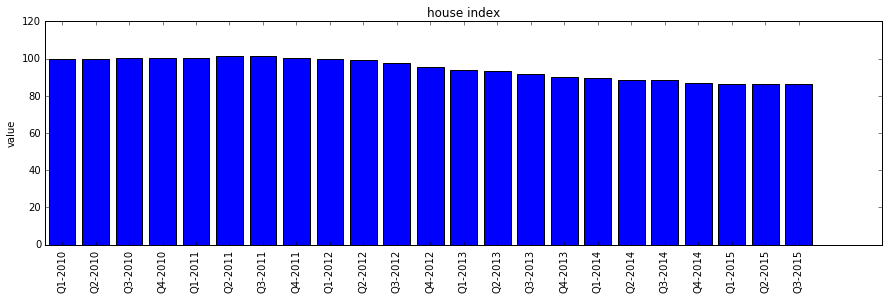

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

values = filtered['Value'].tolist()
labels = filtered['Time and frequency']

xs = [i + 0.1 for i, _ in enumerate(values)]
# bars are by default width 0.8, so we'll add 0.1 to the left coordinates 
# so that each bar is centered

# plot bars with left x-coordinates [xs], heights [num_oscars]
plt.figure(figsize=(15,4))
plt.bar(xs, values)
plt.ylabel("value")
plt.title("house index")

# label x-axis with movie names at bar centers
plt.xticks([i + 0.5 for i, _ in enumerate(labels)], labels, rotation='vertical') 
plt.show()